In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('sudoku.tif', 0)
enhanced_img = cv2.equalizeHist(img)
img = cv2.resize(enhanced_img, None, fx=0.5, fy=0.5)

ret,thresh = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

In [3]:
# img = thresh[:, :] # it worked but it take a little time to run, so i tried another way for decrease the run time
# rows, cols = img.shape

# flag_min_pos = False
# for i in range(rows):
#     for j in range(cols):
#         if img[i, j] != 255:
#             min_pos = i, j
#             flag_min_pos = True
#             break
#     if flag_min_pos:
#         break

# for i in range(rows):
#     for j in range(cols):
#         if img[i, j] != 255:
#             max_pos = i, j

# print(min_pos, max_pos) 

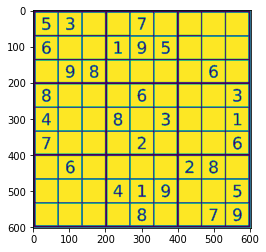

In [4]:
img = np.float32(thresh)
dst = cv2.cornerHarris(img, 2, 3, 0.04)
dst = cv2.dilate(dst, None)

coordinates = np.argwhere(dst)
rows_coordinates = [row[0] for row in coordinates]
cols_coordinates = [cols[1] for cols in coordinates]

min_y = min(rows_coordinates)
max_y = max(rows_coordinates)

min_x = min(cols_coordinates)
max_x = max(cols_coordinates)

without_white_border = np.zeros((max_y-min_y, max_x-min_x), dtype='uint8')
without_white_border = img[min_y:max_y, min_x:max_x]
plt.imshow(without_white_border)

In [5]:
target_img = without_white_border.copy()
rows, cols = target_img.shape

for i in range(9):
    for j in range(9):
        small_img = target_img[int(rows*(i/9))+10: int(rows*((i+1)/9))-10, int(cols*(j/9))+10: int(cols*((j+1)/9))-10]
        pixels_average = np.average(small_img)
        if pixels_average < 240:
            cv2.imwrite(f'output/{i}{j}.jpg', small_img)

In [6]:

cv2.imshow('', target_img)
cv2.waitKey()

-1